# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [3]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼
html = BeautifulSoup(resp.text)
rate_table = [{'name':d.find('td',attrs={'data-table':'幣別'}).find('div',class_='hidden-phone print_show').get_text().replace(' ','').replace('\r','').replace('\n',''),'buy':d.find('td',attrs={'data-table':"本行現金買入"}).text,'sell':d.find('td',attrs={'data-table':'本行現金賣出'}).text} for d in html.find('table','table table-striped table-bordered table-condensed table-hover').find('tbody').find_all('tr')]
print(rate_table[0])

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率


{'name': '美金(USD)', 'buy': '29.74', 'sell': '30.41'}


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [4]:
print(rate_table)

[{'name': '美金(USD)', 'buy': '29.74', 'sell': '30.41'}, {'name': '港幣(HKD)', 'buy': '3.724', 'sell': '3.928'}, {'name': '英鎊(GBP)', 'buy': '36.71', 'sell': '38.83'}, {'name': '澳幣(AUD)', 'buy': '18.55', 'sell': '19.33'}, {'name': '加拿大幣(CAD)', 'buy': '21.28', 'sell': '22.19'}, {'name': '新加坡幣(SGD)', 'buy': '20.83', 'sell': '21.74'}, {'name': '瑞士法郎(CHF)', 'buy': '31.08', 'sell': '32.28'}, {'name': '日圓(JPY)', 'buy': '0.2753', 'sell': '0.2881'}, {'name': '南非幣(ZAR)', 'buy': '-', 'sell': '-'}, {'name': '瑞典幣(SEK)', 'buy': '2.72', 'sell': '3.24'}, {'name': '紐元(NZD)', 'buy': '17.96', 'sell': '18.81'}, {'name': '泰幣(THB)', 'buy': '0.8199', 'sell': '1.0099'}, {'name': '菲國比索(PHP)', 'buy': '0.5173', 'sell': '0.6503'}, {'name': '印尼幣(IDR)', 'buy': '0.00173', 'sell': '0.00243'}, {'name': '歐元(EUR)', 'buy': '32.87', 'sell': '34.21'}, {'name': '韓元(KRW)', 'buy': '0.02303', 'sell': '0.02693'}, {'name': '越南盾(VND)', 'buy': '0.00092', 'sell': '0.00142'}, {'name': '馬來幣(MYR)', 'buy': '5.93', 'sell': '7.555'}, {'name'

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

2020/03/13


<Figure size 720x576 with 0 Axes>

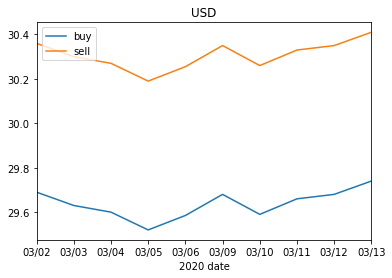

In [41]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt/quote/2020-03/USD"
resp = requests.get(url)
resp.encoding = 'utf-8'

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
html = BeautifulSoup(resp.text)
print(html.find('tbody').find_all('tr')[0].find_all('td')[0].text)
date_list =[]
sell_list=[]
buy_list=[]
for d in html.find('tbody').find_all('tr'):
    date_list.append(d.find_all('td')[0].text[5:])
    buy_list.append(d.find_all('td')[2].text)
    sell_list.append(d.find_all('td')[3].text)
buy_list = [float(d) for d in buy_list]
sell_list = [float(d) for d in sell_list]
data_list = {'2020 date':date_list,'buy':buy_list,'sell':sell_list}
data_df = pd.DataFrame(data_list)
data_df = data_df.set_index('2020 date')
data_df = data_df.sort_index(ascending=True)
plt.figure(figsize=(10, 8))
data_df[['buy','sell']].plot(kind='line',title='USD')
plt.legend(loc="upper left")
plt.show()

# 將匯率資料建成dataframe形式

# 畫出歷史匯率軌跡圖


### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金(USD)
2020/03/13


<Figure size 720x576 with 0 Axes>

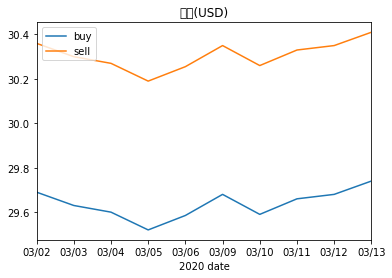

港幣(HKD)
2020/03/13


<Figure size 720x576 with 0 Axes>

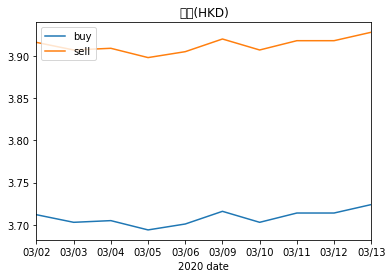

英鎊(GBP)
2020/03/13


<Figure size 720x576 with 0 Axes>

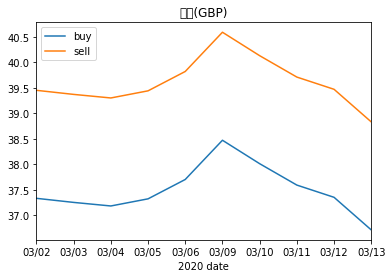

澳幣(AUD)
2020/03/13


<Figure size 720x576 with 0 Axes>

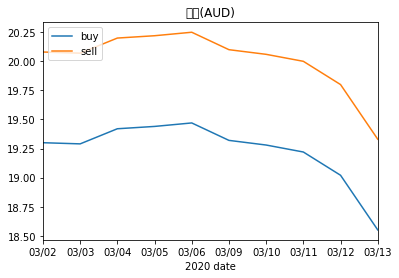

加拿大幣(CAD)
2020/03/13


<Figure size 720x576 with 0 Axes>

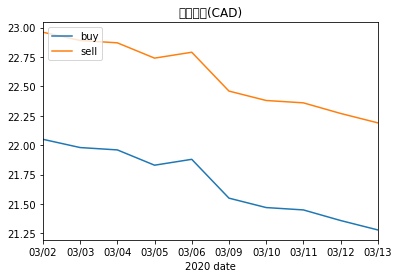

新加坡幣(SGD)
2020/03/13


<Figure size 720x576 with 0 Axes>

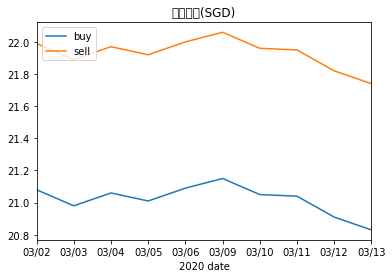

瑞士法郎(CHF)
2020/03/13


<Figure size 720x576 with 0 Axes>

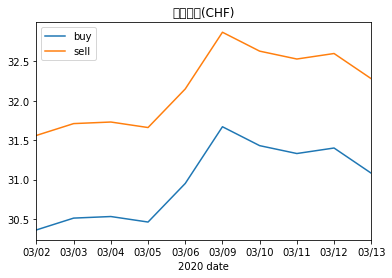

日圓(JPY)
2020/03/13


<Figure size 720x576 with 0 Axes>

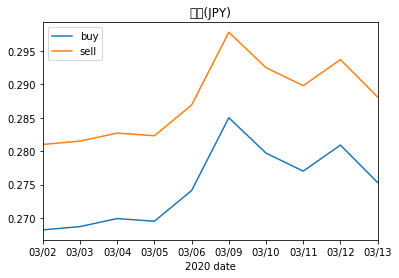

南非幣(ZAR)
2020/03/13


<Figure size 720x576 with 0 Axes>

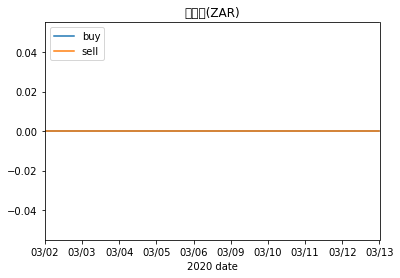

瑞典幣(SEK)
2020/03/13


<Figure size 720x576 with 0 Axes>

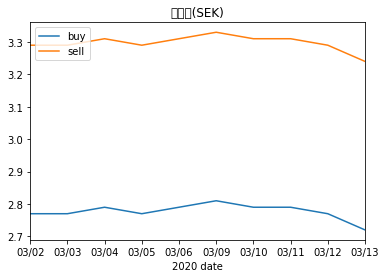

紐元(NZD)
2020/03/13


<Figure size 720x576 with 0 Axes>

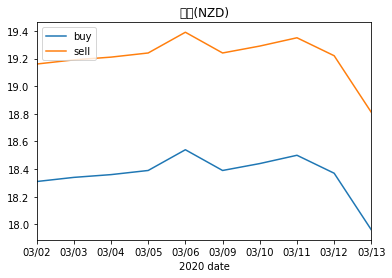

泰幣(THB)
2020/03/13


<Figure size 720x576 with 0 Axes>

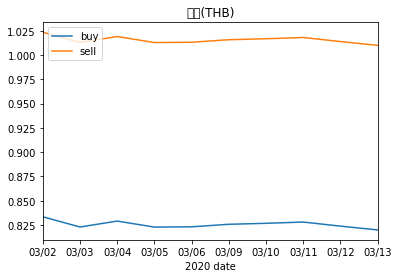

菲國比索(PHP)
2020/03/13


<Figure size 720x576 with 0 Axes>

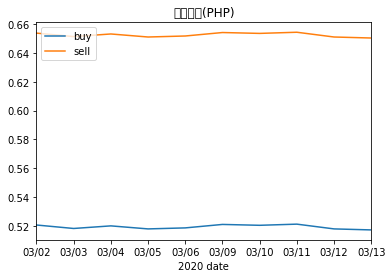

印尼幣(IDR)
2020/03/13


<Figure size 720x576 with 0 Axes>

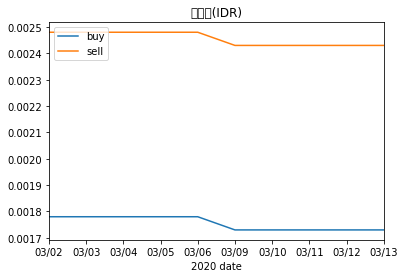

歐元(EUR)
2020/03/13


<Figure size 720x576 with 0 Axes>

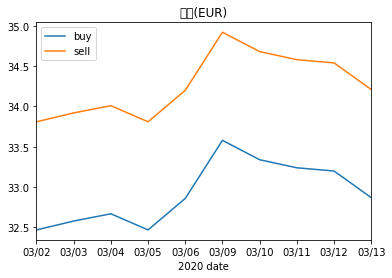

韓元(KRW)
2020/03/13


<Figure size 720x576 with 0 Axes>

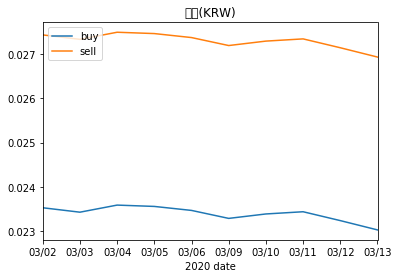

越南盾(VND)
2020/03/13


<Figure size 720x576 with 0 Axes>

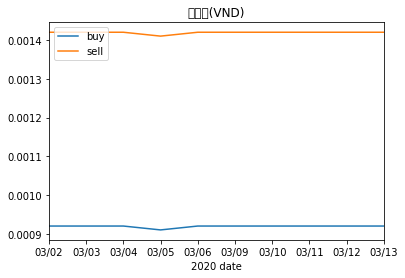

馬來幣(MYR)
2020/03/13


<Figure size 720x576 with 0 Axes>

In [49]:
for rt in rate_table:
  print(rt['name'])
  country  = rt['name'].split('(')[1].replace(')','')
  url = f"https://rate.bot.com.tw/xrt/quote/2020-03/{country}"
  resp = requests.get(url)
  resp.encoding = 'utf-8'

  #
  # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
  #
  html = BeautifulSoup(resp.text)
  print(html.find('tbody').find_all('tr')[0].find_all('td')[0].text)
  date_list =[]
  sell_list=[]
  buy_list=[]
  for d in html.find('tbody').find_all('tr'):
      date_list.append(d.find_all('td')[0].text[5:])
      buy_list.append(d.find_all('td')[2].text)
      sell_list.append(d.find_all('td')[3].text)
  buy_list = [float(d) for d in buy_list]
  sell_list = [float(d) for d in sell_list]
  data_list = {'2020 date':date_list,'buy':buy_list,'sell':sell_list}
  data_df = pd.DataFrame(data_list)
  data_df = data_df.set_index('2020 date')
  data_df = data_df.sort_index(ascending=True)
  plt.figure(figsize=(10, 8))
  data_df[['buy','sell']].plot(kind='line',title=rt['name'],fontproperties="SimSun")
  plt.legend(loc="upper left")
  plt.show()